# Exploratory Data Analysis for APPLE Time‑Series Dataset
This notebook performs a thorough exploratory data analysis (EDA) of a time‑series dataset that combines APPL stock prices with Reddit and news sentiment metrics. The objectives are:
1. Understand the structure and quality of the dataset.
2. Explore temporal patterns in price, volume, and sentiment.
3. Identify relationships between sentiment and market performance.
4. Surface any anomalies, trends, or seasonality that may inform downstream modeling.

In [1]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Stats / TS analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot, autocorrelation_plot

# Config
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
sns.set_style('whitegrid')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

In [2]:
DATA_PATH = '../../data/merged-data/apple-merged.csv'

In [3]:
data = pd.read_csv(DATA_PATH)
print(f'Shape: {data.shape}')
data.head()

Shape: (282, 16)


,Date,Open,High,Low,Close,Volume,author,score,subreddit,tickers_mentioned,clean_text,compound,sentiment,cleaned_headline,sentiment_news,sentiment_score
0,2025-01-02,248.3310,248.5006,241.2381,243.2632,"55,740,700.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-03,242.7744,243.5924,241.3079,242.7744,"40,244,100.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-06,243.7221,246.7348,242.6147,244.4104,"45,045,600.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-07,242.3953,244.9591,240.7692,241.6271,"40,856,000.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-08,241.3378,243.1235,239.4723,242.1160,"37,628,900.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               282 non-null    object 
 1   Open               282 non-null    float64
 2   High               282 non-null    float64
 3   Low                282 non-null    float64
 4   Close              282 non-null    float64
 5   Volume             282 non-null    float64
 6   author             144 non-null    object 
 7   score              144 non-null    float64
 8   subreddit          144 non-null    object 
 9   tickers_mentioned  282 non-null    object 
 10  clean_text         144 non-null    object 
 11  compound           144 non-null    float64
 12  sentiment          144 non-null    object 
 13  cleaned_headline   180 non-null    object 
 14  sentiment_news     180 non-null    object 
 15  sentiment_score    180 non-null    float64
dtypes: float64(8), object(8)
m

None

In [5]:
display(data.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,282,102,2025-05-28,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,282.0000,NaN,NaN,NaN,207.2106,14.0025,171.7248,200.5900,200.5900,208.9710,248.3310
High,282.0000,NaN,NaN,NaN,209.6601,13.9158,190.0907,202.7300,202.7300,211.7890,249.6726
Low,282.0000,NaN,NaN,NaN,205.1578,13.6791,168.9884,198.0903,199.9000,206.6623,244.8989
Close,282.0000,NaN,NaN,NaN,207.2839,13.9123,172.1942,200.4200,200.4200,209.7499,246.7764
Volume,282.0000,NaN,NaN,NaN,"54,149,074.4681","17,545,683.8260","29,925,300.0000","45,339,700.0000","46,963,250.0000","56,288,500.0000","184,395,900.0000"
author,144,15,_thispageexists,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,144.0000,NaN,NaN,NaN,61.2917,101.4945,0.0000,5.0000,19.0000,19.0000,457.0000
subreddit,144,3,wallstreetbets,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tickers_mentioned,282,1,AAPL,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').set_index('Date')

In [7]:
# Forward fill numeric columns if small gaps, else leave for modeling
data[['Open','High','Low','Close','Volume']] = data[['Open','High','Low','Close','Volume']].ffill()

In [8]:
# Create a daily return column
data['Return'] = data['Close'].pct_change()

In [9]:
missing_after = data.isna().sum().sort_values(ascending=False)
print('Missing after preprocessing:')
display(missing_after[missing_after > 0])

Missing after preprocessing:


author              138
score               138
subreddit           138
clean_text          138
compound            138
sentiment           138
cleaned_headline    102
sentiment_news      102
sentiment_score     102
Return                1
dtype: int64

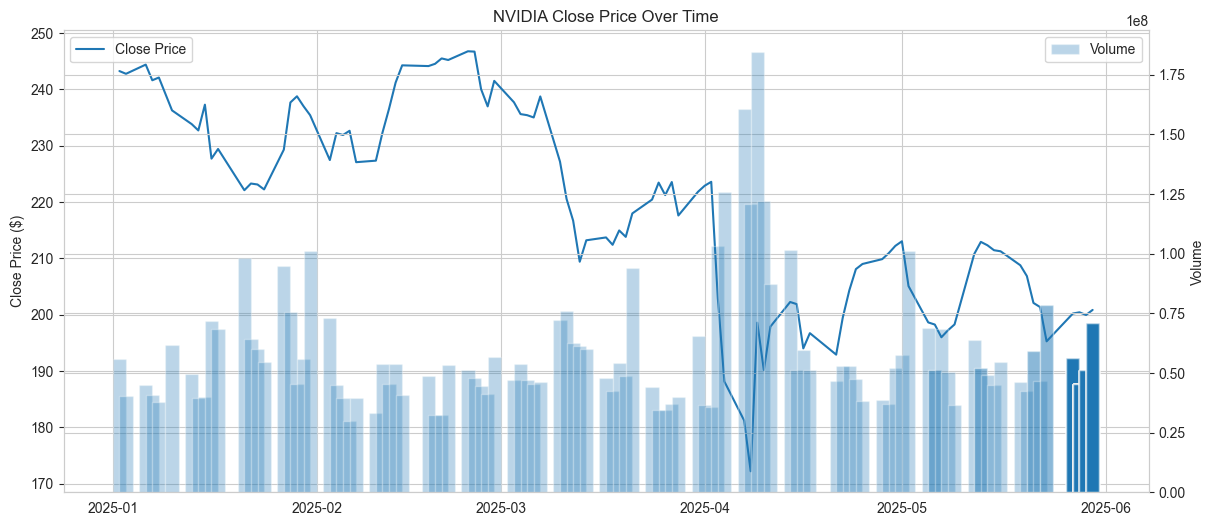

In [10]:
fig, ax1 = plt.subplots(figsize = (14,6))
ax1.plot(data.index, data['Close'], label = 'Close Price')
ax1.set_ylabel('Close Price ($)')
ax1.set_title('NVIDIA Close Price Over Time')
ax1.legend(loc = 'upper left')

# Secondary axis for volume
ax2 = ax1.twinx()
ax2.bar(data.index, data['Volume'], alpha = 0.3, label = 'Volume', width = 2)
ax2.set_ylabel('Volume')
ax2.legend(loc = 'upper right')
plt.show()

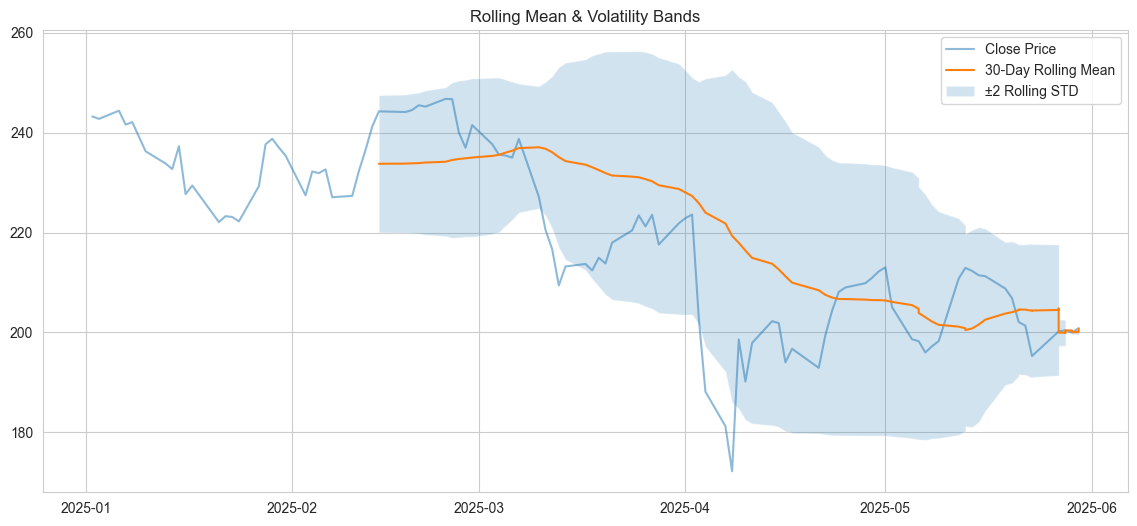

In [11]:
window = 30  # 30 trading days ~ 1.5 months
rolling_mean = data['Close'].rolling(window).mean()
rolling_std = data['Close'].rolling(window).std()

plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(rolling_mean, label=f'{window}-Day Rolling Mean')
plt.fill_between(data.index, rolling_mean - 2*rolling_std, rolling_mean + 2*rolling_std, alpha=0.2, label='±2 Rolling STD')
plt.title('Rolling Mean & Volatility Bands')
plt.legend()
plt.show()

In [12]:
data

,Open,High,Low,Close,Volume,author,score,subreddit,tickers_mentioned,clean_text,compound,sentiment,cleaned_headline,sentiment_news,sentiment_score,Return
Date,,,,,,,,,,,,,,,,
2025-01-02,248.3310,248.5006,241.2381,243.2632,"55,740,700.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,242.7744,243.5924,241.3079,242.7744,"40,244,100.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,-0.0020
2025-01-06,243.7221,246.7348,242.6147,244.4104,"45,045,600.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,0.0067
2025-01-07,242.3953,244.9591,240.7692,241.6271,"40,856,000.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,-0.0114
2025-01-08,241.3378,243.1235,239.4723,242.1160,"37,628,900.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,0.0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30,199.3700,201.9600,196.7800,200.8500,"70,819,900.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,stock futures fade overnight gains after activ...,negative,0.8797,0.0000
2025-05-30,199.3700,201.9600,196.7800,200.8500,"70,819,900.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,chip stocks and big tech shares jump on trump ...,negative,0.7218,0.0000
2025-05-30,199.3700,201.9600,196.7800,200.8500,"70,819,900.0000",NaN,NaN,NaN,AAPL,NaN,NaN,NaN,apples perfect storm tariffs china ai and inno...,neutral,0.8831,0.0000


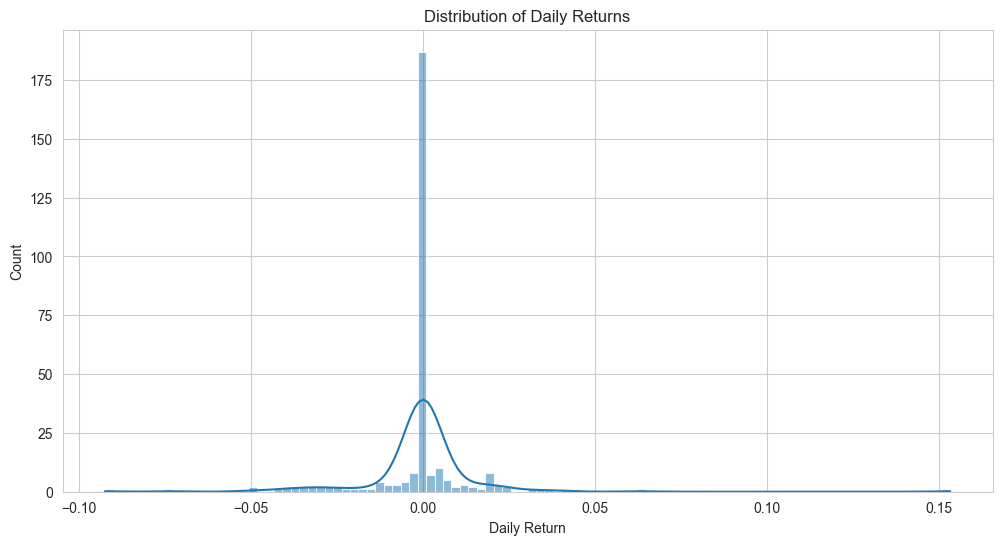

count   281.0000
mean     -0.0005
std       0.0166
min      -0.0925
1%       -0.0487
5%       -0.0292
25%       0.0000
50%       0.0000
75%       0.0000
95%       0.0194
99%       0.0374
max       0.1533
Name: Return, dtype: float64

In [13]:
sns.histplot(data['Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

# Tail analysis
data['Return'].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99])

In [14]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = dict(zip(labels, result[:4]))
    for key, value in out.items():
        print(f'{key}: {value}')
    for key, val in result[4].items():
        print(f'Critical Value {key}: {val}')
    print('---')

adf_test(data['Close'], 'Close Price')
adf_test(data['Return'], 'Return')

Augmented Dickey-Fuller Test: Close Price
ADF Statistic: -1.788472111580129
p-value: 0.3861998029640065
# Lags Used: 14
Number of Observations Used: 267
Critical Value 1%: -3.4550813975770827
Critical Value 5%: -2.8724265892710914
Critical Value 10%: -2.5725712007462582
---
Augmented Dickey-Fuller Test: Return
ADF Statistic: -6.415982171935996
p-value: 1.840852928198688e-08
# Lags Used: 13
Number of Observations Used: 267
Critical Value 1%: -3.4550813975770827
Critical Value 5%: -2.8724265892710914
Critical Value 10%: -2.5725712007462582
---


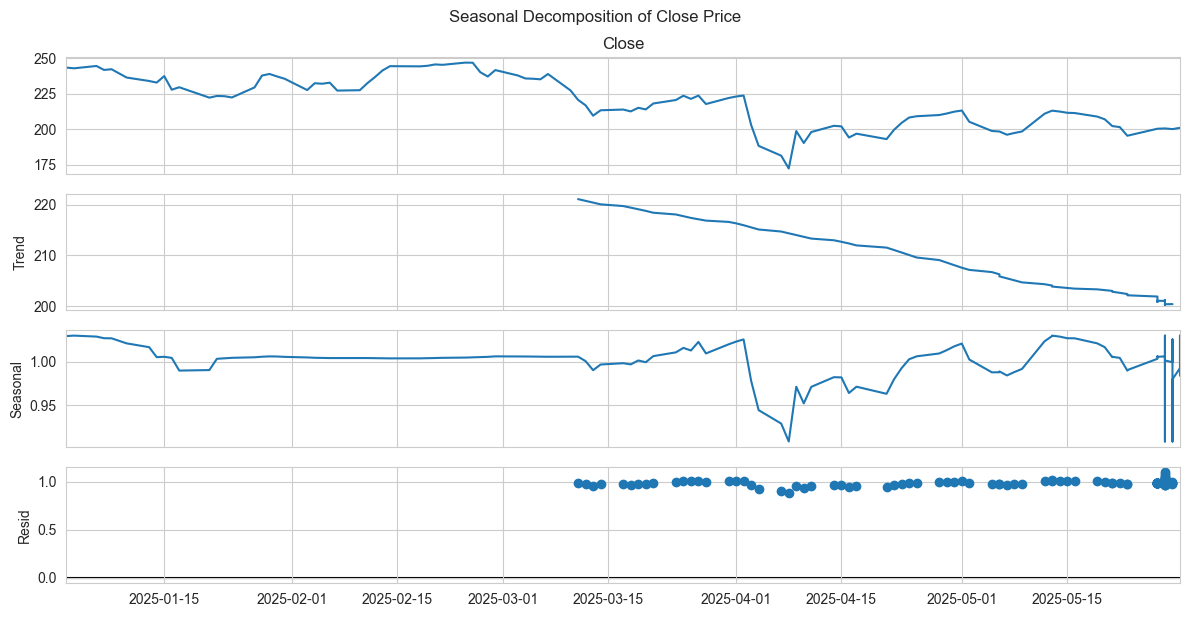

In [17]:
# Decompose with multiplicative model (price often multiplicative)
decomposition = seasonal_decompose(data['Close'], model = 'multiplicative', period = 90)  # ~1 year trading days

decomposition.plot()
plt.suptitle('Seasonal Decomposition of Close Price', y=1.02)
plt.show()

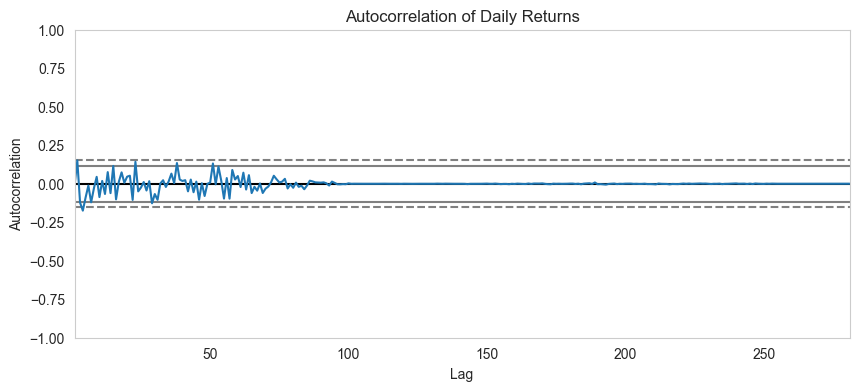

In [18]:
plt.figure(figsize=(10,4))
autocorrelation_plot(data['Return'].dropna())
plt.title('Autocorrelation of Daily Returns')
plt.show()

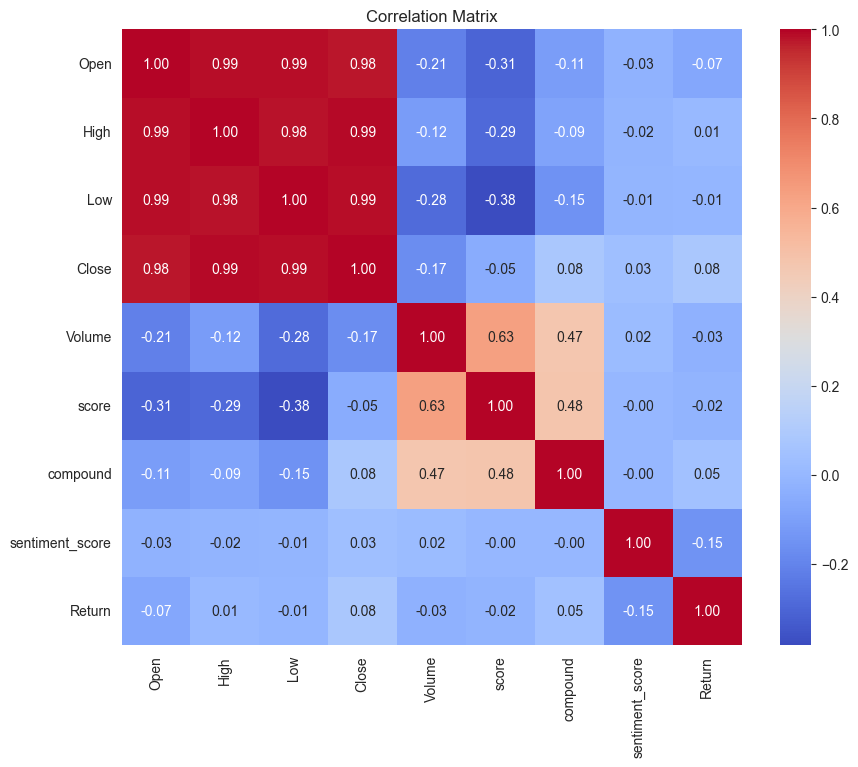

In [19]:
# Select numeric columns for correlation
num_cols = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(), annot = True, fmt='.2f', cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# How many duplicates do I have?
dupes = data.index.duplicated(keep=False).sum()
print(f"Duplicate index rows: {dupes}")

# Quickly inspect a few of them
print(data.index[data.index.duplicated()].unique()[:10])


Duplicate index rows: 188
DatetimeIndex(['2025-05-06', '2025-05-13', '2025-05-21', '2025-05-23',
               '2025-05-27', '2025-05-28', '2025-05-29', '2025-05-30'],
              dtype='datetime64[ns]', name='Date', freq=None)


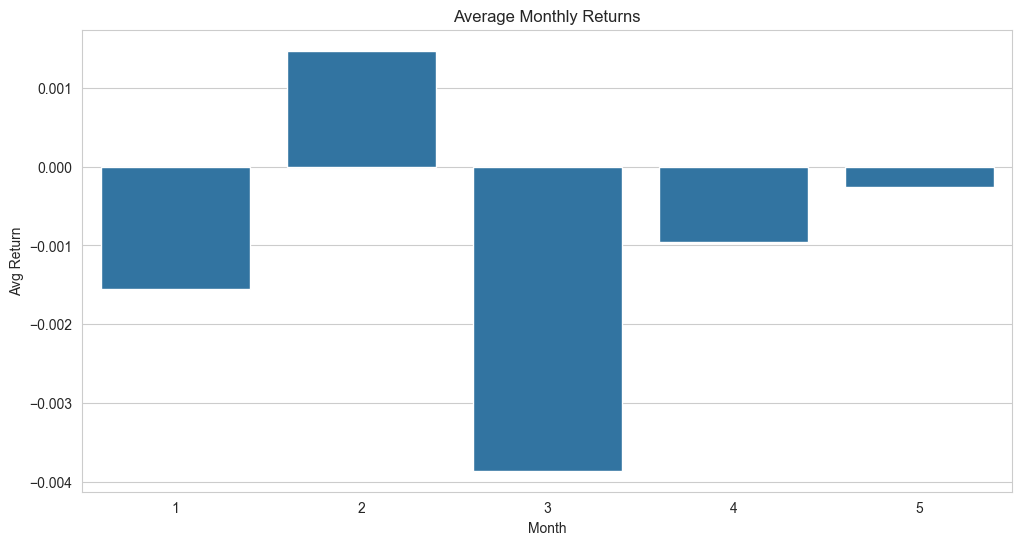

In [21]:
# Monthly seasonality
data['Month'] = data.index.month
monthly_avg = data.groupby('Month')['Return'].mean()

sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Avg Return')
plt.show()

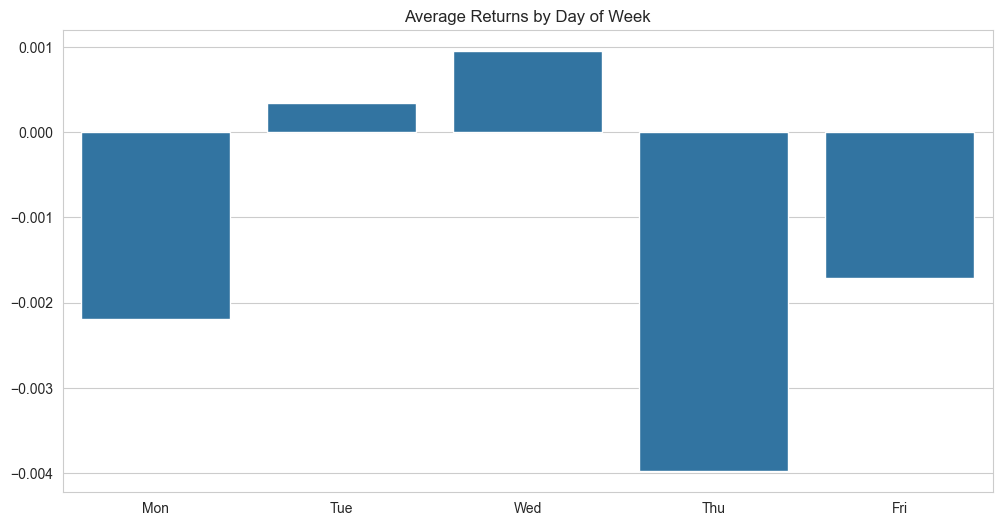

In [22]:
# Day of week effect
data['DayOfWeek'] = data.index.dayofweek  # 0=Monday
dow_avg = data.groupby('DayOfWeek')['Return'].mean()

sns.barplot(x=['Mon','Tue','Wed','Thu','Fri'], y=dow_avg.values)
plt.title('Average Returns by Day of Week')
plt.show()